In [1]:
from __future__ import print_function, division
import os
import numpy as np
import sympy as sy
from iutils.plot.mayaviutils import implicit_plot, drawOriginAxes

In [2]:
%matplotlib inline

In [3]:
# Helper functions
sind = lambda x : np.sin(np.deg2rad(x))
cosd = lambda x : np.cos(np.deg2rad(x))
tand = lambda x : np.tan(np.deg2rad(x))
arcsind = lambda x : np.rad2deg(np.arcsin(x))
arccosd = lambda x : np.rad2deg(np.arccos(x))
arctand = lambda x : np.rad2deg(np.arctan(x))

curDir = os.getcwd()

# Helper function for saving figures
imgdir = os.path.join(curDir, 'images')
if not os.path.exists(imgdir):
    os.makedirs(imgdir)
    print("Created 'images' directory")


bSaveFigure = True
fig_format, fig_ext = 'png', '.png'
def saveFigure(figure, fig_name, DPI=120):
    if bSaveFigure:
        figname = os.path.join(imgdir, fig_name)
        print('figname:', figname)
        figure.savefig(figname, dpi=DPI, facecolor='white', edgecolor='white',
                       bbox_inches='tight', format=fig_format, pad_inches=0.03)

## Lens rotated about a changing pivot point

In [17]:
def get_beta(x, de, zo, f, mp, alpha):
    """compute the object tilt angle (orientation of PoSF) for lens tilted about the x-axis
    about a point (de + x) distance from the ENPP. 
    
    @param: x: increment in distance of ENPP from {C} in fronto-parallel configuration
    @param: de: directed distance of ENPP from {C} in fronto-parallel configuration.
    @param: zo: directed distance of object plane from {C} 
    @param: f: focal length
    @param: mp: pupil magnification
    @param: alpha: angle of rotation (in degrees) of the lens about the pivot about x-axis
    """
    c = cosd(alpha)
    s = sind(alpha)
    numr = s*( mp*(zo + x - (de + x)*c) + f*(1 - mp)*c)
    deno = (f - mp*(de + x)*s**2)*(mp*c**2 + s**2) + (de + x)*mp*(1-mp)*(s**2)*(c**2)
    return -arctand(numr/deno)

def get_zoDash(zo, alpha, beta, f, mp, de, deDash):
    """compute image plane distance (along z-axis of {C})
    
    @param: zo: directed distance of object plane from {C} 
    @param: alpha: angle of rotation (in degrees) of the lens about the pivot about x-axis
    @param: beta: angle of rotation (in degrees) of the object plane about it's pivot about x-axis
    @param: f: focal length
    @param: mp: pupil magnification
    @param: de: directed distance of ENPP from {C} in fronto-parallel configuration.
    @param: deDash: directed distance of EXPP from {C} in fronto-parallel configuration.
    """
    c = cosd(alpha)
    s = sind(alpha)
    t = tand(beta)
    z = zo - de*(s*t + c)
    numr = mp*f*(mp*c**2 + s**2)*z
    deno = mp*c*z + f
    return deDash*c + numr/deno

In [18]:
# ex. optical system "paraxialDoubleLens24mmFiniteConj_mp2.zmx"
zo = -509.0
f = 24.0
mp = 2.0
de = -5.0        # along the optical axis
deDash = -25.0   # along the optical axis

#Image position (zoDash): 24.1707317
#Obj. distance from ENPP (|ze|): 504.0
#Image position from EXPP (|zeDash|): 49.1707316951

# First we ensure that the object-to-ENPP distance (ze) and EXPP-to-image distance (zeDash)
# remains fixed in frontoparallel configuration for different values of x.
alpha = 0
for x in range(3):
    zoNew = zo + x
    deNew = de + x
    deDashNew = deDash + x
    ze = zoNew - deNew*cosd(alpha)
    # since the function get_zoDash computes zoNew, and deNew we just pass zo and de (the initial values)
    beta = get_beta(x=x, de=de, zo=zo, f=f, mp=mp, alpha=alpha) 
    zoDash = get_zoDash(zo=zoNew, alpha=alpha, beta=beta, f=f, mp=mp, de=deNew, deDash=deDashNew)
    zeDash = zoDash - deDashNew*cosd(alpha)
    print(('zo = {:3.2f}, zoDash = {:3.2f}, d = {:3.2f}, ze = {:3.2f}, zeDash = {:3.2f}'
           .format(zoNew, zoDash, deDashNew - deNew, ze, zeDash)))

zo = -509.00, zoDash = 24.17, d = -20.00, ze = -504.00, zeDash = 49.17
zo = -508.00, zoDash = 25.17, d = -20.00, ze = -504.00, zeDash = 49.17
zo = -507.00, zoDash = 26.17, d = -20.00, ze = -504.00, zeDash = 49.17


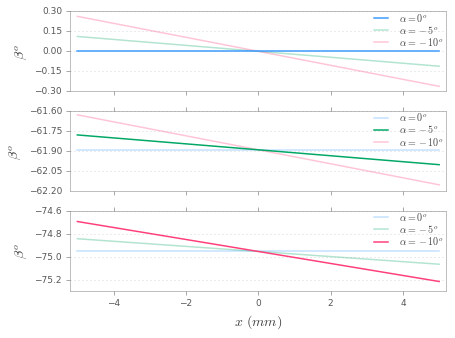

In [19]:
alphaArr = [0, -5, -10]

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8*0.8, 6*0.8))
(ax0, ax1, ax2) = axes.flatten()

x = np.linspace(-5, 5, 21)
beta0 = get_beta(x=x, de=de, zo=zo, f=f, mp=mp, alpha=alphaArr[0])
beta1 = get_beta(x=x, de=de, zo=zo, f=f, mp=mp, alpha=alphaArr[1])
beta2 = get_beta(x=x, de=de, zo=zo, f=f, mp=mp, alpha=alphaArr[2])
beta0Mean = np.mean(beta0)
beta1Mean = np.mean(beta1)
beta2Mean = np.mean(beta2)
 
#print(beta0Mean, beta1Mean, beta2Mean)
alphaLight = 0.3
lwLight = 1.5
lwEmph = 1.5

ax0.plot(x, beta0, color='#3A9AFF', lw=lwEmph, 
        label=r'$\alpha={}^o$'.format(alphaArr[0]), zorder=10)
ax0.plot(x, beta1 - beta1Mean,  color='#00A765', alpha=alphaLight, lw=lwLight, 
        label=r'$\alpha={}^o$'.format(alphaArr[1]), zorder=8)
ax0.plot(x, beta2 - beta2Mean, color='#FF3F7A', alpha=alphaLight, lw=lwLight,
        label=r'$\alpha={}^o$'.format(alphaArr[2]), zorder=8)

ax1.plot(x, beta0 + beta1Mean, color='#3A9AFF', alpha=alphaLight, lw=lwLight,
        label=r'$\alpha={}^o$'.format(alphaArr[0]), zorder=8)
ax1.plot(x, beta1, color='#00A765', lw=lwEmph,
        label=r'$\alpha={}^o$'.format(alphaArr[1]), zorder=10)
ax1.plot(x, beta2 + (beta1Mean - beta2Mean), color='#FF3F7A', alpha=alphaLight, lw=lwLight,
        label=r'$\alpha={}^o$'.format(alphaArr[2]), zorder=8)


ax2.plot(x, beta0 + beta2Mean, color='#3A9AFF', alpha=alphaLight, lw=lwLight,
        label=r'$\alpha={}^o$'.format(alphaArr[0]), zorder=8)
ax2.plot(x, beta1 + (beta2Mean - beta1Mean), color='#00A765', alpha=alphaLight, lw=lwLight,
        label=r'$\alpha={}^o$'.format(alphaArr[1]), zorder=8)
ax2.plot(x, beta2, color='#FF3F7A', lw=lwEmph,
        label=r'$\alpha={}^o$'.format(alphaArr[2]), zorder=10)

# plot decorations
# common to all axes
for ax in [ax0, ax1, ax2]:
    ax.set_xlim(x[0]-0.2, x[-1] + 0.2)                # x limit
    ax.grid(axis='y', alpha=0.4)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))    # number of ticks
    ax.yaxis.set_ticks_position('left')               # tick 
    ax.set_ylabel(r'$\beta^o$', fontsize=14)          # y-label
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(9) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(9) 

    
ax0.xaxis.set_ticks_position('bottom')
ax2.set_xlabel(r'$x\,\,(mm)$', fontsize=14)

# legends
ax0.legend(loc=(0.79, 0.5), labelspacing=0.008, fontsize=10)
ax1.legend(loc=(0.79, 0.5), labelspacing=0.008, fontsize=10)
ax2.legend(loc=(0.79, 0.5), labelspacing=0.008, fontsize=10)

fig.tight_layout()

# Save the figure  
#saveFigure(fig, 'object_tilt_angle_with_pivot_movement.png')

plt.show()

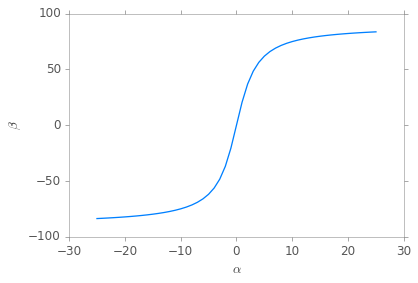

In [13]:
# plot of alpha vs. beta (may be just for fun .... that's all!)
# this plot shows that given alpha, we can get a unique beta within +/-90°
alpha = np.linspace(-25., 25., 51)
beta = get_beta(x=0, de=-5.0, zo=-509.0, f=24.0, mp=2.0, alpha=alpha)

plt.plot(alpha, beta)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

## Lens rotated about the x-axis at ENPP

In [15]:
def compute_zoDash(zo, f, mp, d, alpha):
    """formula for computing the image plane distance from the pivot (origin of {C}) if
    lens is tilted about the ENPP. That is de=0, deDash = d
    
    @param: zo: object distance along z-axis
    @param: f: focal length
    @param: mp: pupil magnification
    @param: d: distance from ENPP to EXPP
    @param: alpha: angle of image plane tilt about x-axis (in degrees)
    """
    c = cosd(alpha)
    s = sind(alpha)
    return d*c + mp*f*zo*(mp*c**2 + s**2)/(zo*mp*c + f)


def beta_exact(zo, f, mp, alpha):
    """formula for computing the object plane tilt angle if
    lens is tilted about the ENPP. That is de=0, deDash = d
    
    @param: zo: object distance along z-axis
    @param: f: focal length
    @param: mp: pupil magnification
    @param: alpha: angle of image plane tilt about x-axis (in degrees)
    """
    c = cosd(alpha)
    s = sind(alpha)
    t = -s*(mp*zo + (1-mp)*f*c)/(f*(mp*c**2 + s**2))
    return arctand(t)

def beta_thin(zo, f, alpha):
    return -arctand(zo*sind(alpha)/f)

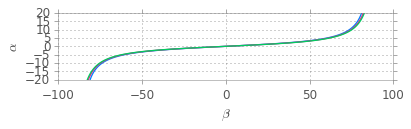

In [16]:
zo = -509.0
f = 24.0
mpArr = [0.55, 1, 2.0]

alpha = np.linspace(-20, 20, 101)

fig, ax = plt.subplots(1,1)

for mp in mpArr:
    beta = beta_exact(zo, f, mp, alpha)
    ax.plot(beta, alpha)
    

# No need to plot beta_thin ... this is same as mp=1    
#betaT = beta_thin(zo, f, alpha)
#ax.plot(betaT, alpha, 'k-')

ax.grid()
ax.set_ylabel(r'$\alpha$')
ax.set_xlabel(r'$\beta$')
ax.set_aspect('equal')
plt.show()

In [40]:
def alpha_thin(zo, f, beta):
    return -arcsind(f*tand(beta)/zo)

def alpha_approx(zo, f, mp, beta):
    a = 1
    alphaThin = alpha_thin(zo, f, beta)
    b = (mp*zo/cosd(alphaThin) + f*(1-mp))/(f*tand(beta))
    c = mp
    k = np.sqrt(b**2 - 4*a*c)
    #t1 = 0.5*(-b - k)
    #t2 = 0.5*(-b + k)
    #print(t1, t2)
    roots = arctand(0.5*(-b - k)), arctand(0.5*(-b + k))
    #print('roots = ', roots)
    return roots[0] if alphaThin > 0 else roots[1]

In [41]:
zo = -509.0
f = 24.0
mp = 2.0
alphaExact = 5.0
d = -20

betaExact = beta_exact(zo, f, mp, alphaExact)
alphaApprox = alpha_approx(zo, f, mp, betaExact)
print('beta = ', betaExact)
print('alpha (true) = ', alphaExact)
print('alpha (approximate) =', alphaApprox)
print('Effect of alpha approximate on zDash:')
print('zDash (true) = ', compute_zoDash(zo, f, mp, d, alphaExact))
print('zDash (approx) = ', compute_zoDash(zo, f, mp, d, alphaApprox))

beta =  62.2296825491
alpha (true) =  5.0
alpha (approximate) = 4.99895906397
Effect of alpha approximate on zDash:
zDash (true) =  29.2399513946
zDash (approx) =  29.2399175376


In [42]:
zo = -509.0
f = 24.0
mp = 1.0
alphaExact = -5.0

betaExact = beta_exact(zo, f, mp, alphaExact)
alphaApprox = alpha_approx(zo, f, mp, betaExact)
print('beta = ', betaExact)
print('alpha (true) = ', alphaExact)
print('alpha (approximate) =', alphaApprox)
print('Effect of alpha approximate on zDash:')
print('zDash (true) = ', compute_zoDash(zo, f, mp, d, alphaExact))
print('zDash (approx) = ', compute_zoDash(zo, f, mp, d, alphaApprox))

beta =  -61.5866016756
alpha (true) =  -5.0
alpha (approximate) = -5.0
Effect of alpha approximate on zDash:
zDash (true) =  5.36472768283
zDash (approx) =  5.36472768283


In [43]:
zo = -509.0
f = 24.0
mp = 0.55
alphaExact = -5.0

betaExact = beta_exact(zo, f, mp, alphaExact)
alphaApprox = alpha_approx(zo, f, mp, betaExact)
print('beta = ', betaExact)
print('alpha (true) = ', alphaExact)
print('alpha (approximate) =', alphaApprox)
print('Effect of alpha approximate on zDash:')
print('zDash (true) = ', compute_zoDash(zo, f, mp, d, alphaExact))
print('zDash (approx) = ', compute_zoDash(zo, f, mp, d, alphaApprox))

beta =  -60.4849588349
alpha (true) =  -5.0
alpha (approximate) = -5.0017663116
Effect of alpha approximate on zDash:
zDash (true) =  -5.33570372548
zDash (approx) =  -5.33554340954


In [44]:
zo = -1509.0
f = 25.0
mp = 4.0
alphaExact = -10.0

betaExact = beta_exact(zo, f, mp, alphaExact)
alphaApprox = alpha_approx(zo, f, mp, betaExact)
print('beta = ', betaExact)
print('alpha (true) = ', alphaExact)
print('alpha (approximate) =', alphaApprox)
print('Effect of alpha approximate on zDash:')
print('zDash (true) = ', compute_zoDash(zo, f, mp, d, alphaExact))
print('zDash (approx) = ', compute_zoDash(zo, f, mp, d, alphaApprox))

beta =  -84.7366457352
alpha (true) =  -10.0
alpha (approximate) = -9.98889950828
Effect of alpha approximate on zDash:
zDash (true) =  79.9692555224
zDash (approx) =  79.9702307594


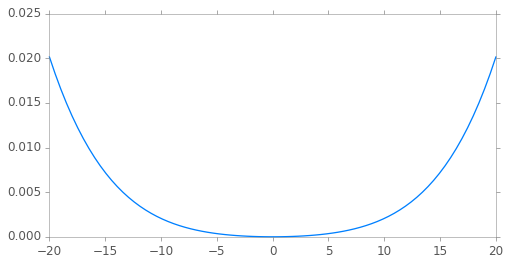

In [19]:
zo = -509.0
f = 25.0
mp = 6.0


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
alphaExact = np.linspace(-20, 20, 80)

alphaApprox = []    
for alpha in alphaExact:
    betaExact = beta_exact(zo, f, mp, alpha)
    alphaApprox.append(alpha_approx(zo, f, mp, betaExact))
alphaApprox = np.array(alphaApprox)
err = np.abs(alphaExact - alphaApprox)
relErr = err/np.abs(alphaExact)#
ax.plot(alphaExact, relErr, clip_on=False)

plt.show()

figname: C:\GIT_REPOSITORIES\phd-artifacts\chapters\chapter03_geometricmodel\code\images\approximation_of_lens_tilt.png


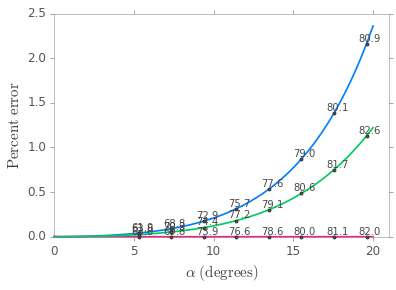

In [45]:
from matplotlib.ticker import FuncFormatter

zo = -509.0
f = 24.0
mpArr = [0.55, 1, 2.0]


fig, ax = plt.subplots(1, 1)
alphaExact = np.linspace(0.0001, 20)

for mp in mpArr:
    alphaApprox = []
    betaArr = []
    for alpha in alphaExact:
        beta = beta_exact(zo, f, mp, alpha)
        alphaApprox.append(alpha_approx(zo, f, mp, beta))
        betaArr.append(beta)
    alphaApprox = np.array(alphaApprox)
    err = np.abs(alphaExact - alphaApprox)
    relErr = 100.0*err/np.abs(alphaExact)#
    ax.plot(alphaExact, relErr, lw=1.7, clip_on=False)
    #ax.errorbar(alphaExact, relErr, xerr=0.0, yerr=err, clip_on=False)
    indices = np.argwhere(alphaExact > 5).flatten()[::5]
    ax.scatter(alphaExact[indices], relErr[indices], s=8, clip_on=False, 
               facecolor='#555555', edgecolor=None, zorder=10)
    for i in indices:
        ax.text(x=alphaExact[i]-0.5, y=relErr[i]+0.025, s='{:0.1f}'.format(betaArr[i]))
    
ax.set_ylabel(r'$\rm{Percent}\,\,\rm{error}$', fontsize=15)
ax.set_xlabel(r'$\alpha \,\,\rm(degrees)$', fontsize=15)
ax.set_xlim(alphaExact[0], alphaExact[-1] + 1)
ax.set_ylim(-0.001, 2.5)

#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

# Save the figure  
saveFigure(fig, 'approximation_of_lens_tilt.png')

plt.show()

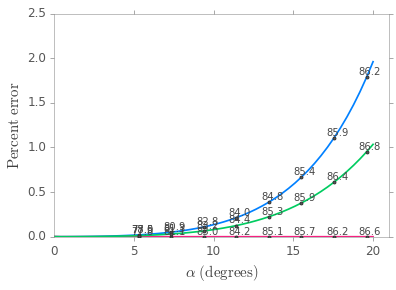

In [21]:
zo = -5009.0
f = 100.0
mpArr = [0.55, 1, 2.0]


fig, ax = plt.subplots(1, 1)
alphaExact = np.linspace(0.0001, 20)

for mp in mpArr:
    alphaApprox = []
    betaArr = []
    for alpha in alphaExact:
        beta = beta_exact(zo, f, mp, alpha)
        alphaApprox.append(alpha_approx(zo, f, mp, beta))
        betaArr.append(beta)
    alphaApprox = np.array(alphaApprox)
    err = np.abs(alphaExact - alphaApprox)
    relErr = 100.0*err/np.abs(alphaExact)#
    ax.plot(alphaExact, relErr, lw=1.7, clip_on=True)
    #ax.errorbar(alphaExact, relErr, xerr=0.0, yerr=err, clip_on=False)
    indices = np.argwhere(alphaExact > 5).flatten()[::5]
    ax.scatter(alphaExact[indices], relErr[indices], s=8, clip_on=True, 
               facecolor='#555555', edgecolor=None, zorder=10)
    for i in indices:
        ax.text(x=alphaExact[i]-0.5, y=relErr[i]+0.025, s='{:0.1f}'.format(betaArr[i]))
    
ax.set_ylabel(r'$\rm{Percent}\,\,\rm{error}$', fontsize=15)
ax.set_xlabel(r'$\alpha \,\,\rm(degrees)$', fontsize=15)
ax.set_xlim(alphaExact[0], alphaExact[-1] + 1)
ax.set_ylim(-0.001, 2.5)

#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.show()

In [46]:
fl = 24.0

alphaOpt = 5.0
betaOpt = beta_exact(-509.0, fl, 2.0, alphaOpt)
print('beta_opt = ', betaOpt)
t = np.tan(np.deg2rad(betaOpt))

a = fl*mp*t
b = fl*t 
c = fl*(1-mp)/2.0
d = 0/2.0
e = mp*zo/2.0
f = 0

expr = []
alpha = np.linspace(-120, 70, 201)

for each in alpha:
    x = cosd(each)
    y = sind(each)
    expr.append((c*x + b*y + e)/(a*x + c*y + d))

expr = np.array(expr)
    
ct = np.tan(np.deg2rad(alpha))

beta_opt =  62.2296825491


In [48]:
fl = 24.0
alphaOpt = -5.0
zo = -509.0
mp = 2.0
betaOpt = beta_exact(zo, fl, mp, alphaOpt)
print('beta_opt = ', betaOpt)
t = np.tan(np.deg2rad(betaOpt))

a = fl*mp*t
b = fl*t 
c = fl*(1-mp)/2.0
d = 0/2.0
e = mp*zo/2.0
f = 0

x = cosd(alphaOpt)
y = sind(alphaOpt)

print(a*x**2 + b*y**2 + 2*c*x*y + 2*d*x + 2*e*y + f)

print(t + sind(alphaOpt)*(mp*zo + fl*(1-mp)*cosd(alphaOpt))/(fl*(mp*cosd(alphaOpt)**2 + sind(alphaOpt)**2)))

beta_opt =  -62.2296825491
-5.68434188608e-14
-4.4408920985e-16


In [51]:
# finding the optimum angle
alpha_thin(zo=-509.0, f=24.0, beta=betaOpt)

-5.1373032521759248

In [459]:
zo = -509.0
f = 24.0   # 100
mp = 0.55
alphaTrue = -15.0

#zo=-539.359427021; f=89.8074019381; mp=0.155474178141; alphaTrue=-6.10160377014;
mp = 0.108342986115; zo = -928.149214632; f = 54.8193565806; alphaTrue = -27.0718326653

beta = beta_exact(zo=zo, f=f, mp=mp, alpha=alphaTrue)
alphaInit = alpha_thin(zo=zo, f=f, beta=beta)

print('alpha (true) = ', alphaTrue)
print('beta =', beta)
print('Initial alpha = ', alphaInit)

errValStop = 1e-16
stepThreshold = 10
i = 0
t = tand(beta)
s = sind(alphaInit)
c = cosd(alphaInit)
prevErr = t + s*(mp*zo + f*(1-mp)*c)/(f*(mp*c**2 + s**2)) # Initial merit function value
#prevErr = beta + arctand(s*(mp*zo + f*(1-mp)*c)/(f*(mp*c**2 + s**2))) # Initial merit function value
alpha_i = alphaInit
step = 0.5*prevErr

print("Initial error = ", prevErr)
print("np.arctan(prevErr) = ", np.arctan(prevErr))
print('Initial step = ', step)
print('np.arctan(step) =', np.arctan(step))
print()

while (abs(prevErr) > errValStop) and (i < stepThreshold):
    i += 1
    alpha_i += step 
    s = sind(alpha_i)
    c = cosd(alpha_i)
    err = t + s*(mp*zo + f*(1-mp)*c)/(f*(mp*c**2 + s**2))
    #err = beta + arctand(s*(mp*zo + f*(1-mp)*c)/(f*(mp*c**2 + s**2)))
    deltaErr = err - prevErr   
    print('-------------')
    print('err({}) = {:2.4f}'.format(i, err))
    print('deltaErr({}) = {:2.4f}'.format(i, deltaErr))
    print('prevErr({}) = {:2.4f}'.format(i, prevErr))
    print('alpha({}) = {:2.4f}'.format(i, alpha_i))
    if np.sign(err)/np.sign(prevErr) < 0: # modify step direction and possibly size only if i > 0
        step = 0.5*deltaErr
        print('**Sign change: changing step to ', step)
    prevErr = err
    
print('Value of alpha after {} iterations = {:2.5f} (error = {:2.5e}, merit = {:2.5e})'
      .format(i, alpha_i, alphaTrue - alpha_i, err))

alpha (true) =  -27.0718326653
beta = -58.2482831727
Initial alpha =  -5.47655821752
Initial error =  -20.4423265781
np.arctan(prevErr) =  -1.52191717994
Initial step =  -10.2211632891
np.arctan(step) = -1.47327048461

-------------
err(1) = -1.5729
deltaErr(1) = 18.8695
prevErr(1) = -20.4423
alpha(1) = -15.6977
-------------
err(2) = 0.0520
deltaErr(2) = 1.6249
prevErr(2) = -1.5729
alpha(2) = -25.9189
**Sign change: changing step to  0.812442062781
-------------
err(3) = 0.0751
deltaErr(3) = 0.0231
prevErr(3) = 0.0520
alpha(3) = -25.1064
-------------
err(4) = 0.0845
deltaErr(4) = 0.0094
prevErr(4) = 0.0751
alpha(4) = -24.2940
-------------
err(5) = 0.0777
deltaErr(5) = -0.0068
prevErr(5) = 0.0845
alpha(5) = -23.4816
-------------
err(6) = 0.0519
deltaErr(6) = -0.0258
prevErr(6) = 0.0777
alpha(6) = -22.6691
-------------
err(7) = 0.0039
deltaErr(7) = -0.0480
prevErr(7) = 0.0519
alpha(7) = -21.8567
-------------
err(8) = -0.0700
deltaErr(8) = -0.0739
prevErr(8) = 0.0039
alpha(8) = -21.

In [428]:
def estimate_alpha(zo, f, mp, beta, maxSteps=150):
    """
    """
    errValStop = 1e-16
    stepThreshold = maxSteps
    i = 0
    t = tand(beta)
    alphaInit = alpha_thin(zo=zo, f=f, beta=beta)
    s = sind(alphaInit)
    c = cosd(alphaInit)
    prevErr = t + s*(mp*zo + f*(1-mp)*c)/(f*(mp*c**2 + s**2)) # Initial merit function value
    alpha_i = alphaInit
    step = 0.5*prevErr

    while (abs(prevErr) > errValStop) and (i < stepThreshold):
        i += 1
        alpha_i += step 
        s = sind(alpha_i)
        c = cosd(alpha_i)
        err = t + s*(mp*zo + f*(1-mp)*c)/(f*(mp*c**2 + s**2))
        deltaErr = err - prevErr   
        if np.sign(err)/np.sign(prevErr) < 0: 
            step = 0.5*deltaErr
        prevErr = err
    return alpha_i, i, err

In [455]:
for i in range(6000):
    mp = 0.001 + 4*np.random.random() # problematic
    #mp = 0.2 + 4*np.random.random()  # fine
    zo = -500 - 1000*np.random.random()
    f = 50 + 50*np.random.random()
    alpha = (-1)**np.random.randint(1,3) * 30*np.random.random()
    #
    c = cosd(alpha)
    if mp < f*c/(abs(zo) + f*c):
        break  # the condition is not valid (the consequence is that alpha and beta will not have same sign)
    beta = beta_exact(zo=zo, f=f, mp=mp, alpha=alpha)
    # also reject those cases if beta < alpha, because we know that it is not possible
    # (I still need to understand why we get this condition sometimes)
    if abs(beta) < abs(alpha):
        break
    
    if (mp - f*c/(abs(zo) + f*c)) < 0.06:
        print('secondary condition:', mp - f*c/(abs(zo) + f*c))
        #break
        
    alphaEst, numSteps, _ = estimate_alpha(zo=zo, f=f, mp=mp, beta=beta)
    if abs(alpha - alphaEst) > 1e-7:
        print()
        print('mp = {}; zo = {}; f = {}; alpha = {}'.format(mp, zo, f, alpha))
        print('alpha (actual) = {:2.4f}; alpha (est) = {:2.4f}; steps = {}; error = {:2.2e}'
              .format(alpha, alphaEst, numSteps, alpha - alphaEst))
        

secondary condition: 0.0562836567862

mp = 0.101679253101; zo = -1079.87808266; f = 58.416738787; alpha = -28.4685848773
alpha (actual) = -28.4686; alpha (est) = -18.6248; steps = 150; error = -9.84e+00


In [ ]:
# problematic cases found (that still meets the condition):

#
#mp = 0.155474178141; zo = -539.359427021; f = 89.8074019381; alpha = -6.10160377014
#alpha (actual) = -6.1016; alpha (est) = -4.6847; steps = 150; error = -1.42e+00


#
#mp = 0.160118447418; zo = -929.295779676; f = 96.1492470341; alpha = 23.0223723112
#alpha (actual) = 23.0224; alpha (est) = 23.0207; steps = 150; error = 1.67e-03

#
#mp = 0.120164140759; zo = -1133.89717609; f = 84.8370919439; alpha = -27.7399990294
#alpha (actual) = -27.7400; alpha (est) = -27.9950; steps = 150; error = 2.55e-01


#mp = 0.127254588021; zo = -1342.47405012; f = 65.0107548829; alpha = -18.6756216453
#alpha (actual) = -18.6756; alpha (est) = -18.6756; steps = 150; error = 1.45e-05
#

#mp = 0.108342986115; zo = -928.149214632; f = 54.8193565806; alpha = -27.0718326653
#alpha (actual) = -27.0718; alpha (est) = -21.8048; steps = 150; error = -5.27e+00

#
#mp = 0.101679253101; zo = -1079.87808266; f = 58.416738787; alpha = -28.4685848773
#alpha (actual) = -28.4686; alpha (est) = -18.6248; steps = 150; error = -9.84e+00


In [431]:
mp = 0.108342986115; zo = -928.149214632; f = 54.8193565806; alpha = -27.0718326653
estimate_alpha(zo=zo, f=f, mp=mp, beta=beta, maxSteps=150)

(-21.804789584699559, 150, -6.9911096911567938e-07)

In [460]:
# understand the conditions for valid results
#zo=-509.0; f=24.0; mp=0.55; alpha=-15;
#zo=-655.674286325; f=81.6602220572; mp=0.0441952155845; alpha=-14.6948487664;  # invalid condition
#zo=-539.359427021; f=89.8074019381; mp=0.155474178141; alpha=-6.10160377014; # valid condition, but still didn't converge
#zo=-1342.47405012; f=65.0107548829; mp=0.127254588021; alpha=-18.6756216453
#zo=-539.359427021; f=89.8074019381; mp=0.157; alpha=-6.10160377014;
mp = 0.108342986115; zo = -928.149214632; f = 54.8193565806; alpha = -27.0718326653
#mp = 0.101679253101; zo = -1079.87808266; f = 58.416738787; alpha = -28.4685848773

beta = beta_exact(zo=zo, f=f, mp=mp, alpha=alpha)
print('alpha =', alpha)
print('beta =', beta)

c = cosd(alpha)
s = sind(alpha)

print('Condition met?', mp > f*c/(abs(zo) + f*c))     # This condition must be satisfied
print(mp - f*c/(abs(zo) + f*c))

print('Secondary condition met?', mp > f/(abs(zo) + f))    
print(mp - f/(abs(zo) + f))

# computation steps for beta
numr = mp*zo + f*(1 - mp)*c
deno = f*(mp*c**2 + s**2)
print('numr =', numr)  # should be negative
print('deno =', deno)  # should be positive
tbeta = -s*numr/deno
print('tbeta =', tbeta)
print(arctand(tbeta))


alpha = -27.0718326653
beta = -58.2482831727
Condition met? True
0.0583787651609
Secondary condition met? True
0.0525738006232
numr = -57.0338572824
deno = 16.0634574502
tbeta = -1.6158737851
-58.2482831727


In [462]:
tand(-60)

-1.7320508075688767